<a href="https://colab.research.google.com/github/Yesh287/Basic-Ml/blob/main/EDA_on_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


([<matplotlib.patches.Wedge at 0x7c48a1281c50>,
 [Text(-0.1875172830328172, 1.0838991044206978, '3'),
  Text(-0.46696967499527325, -0.9959615066029455, '2'),
  Text(0.863700461607396, -0.6811912452602216, '4'),
  Text(1.0981458823614798, -0.0638405909475088, '5')],
 [Text(-0.10228215438153664, 0.5912176933203805, '55%'),
  Text(-0.25471073181560355, -0.5432517308743339, '25%'),
  Text(0.4711093426949432, -0.3715588610510299, '18%'),
  Text(0.5989886631062616, -0.034822140516822975, '2%')])

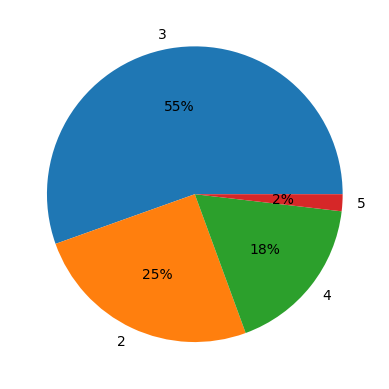

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Housing.csv")
print(df.columns)

freq_bedrooms = df.bedrooms.value_counts().values
plt.pie(freq_bedrooms[:4],labels=df.bedrooms.value_counts().index[:4],autopct='%1.f%%')

Most of the houses have 2-4 bedrooms

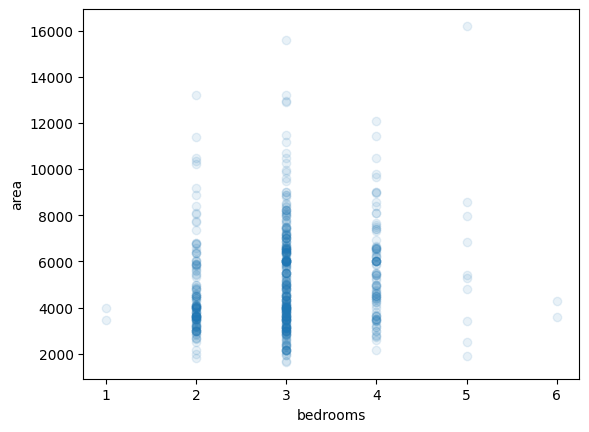

In [ ]:
y = df.groupby(['bedrooms','area']).size().reset_index().rename(columns={0:"Count"})
plt.scatter(y=df.area,x=df.bedrooms,alpha=0.1)
plt.ylabel('area')
plt.xlabel('bedrooms')
plt.show()

as area increases the number of bedrooms also increase but a significant amount either have much more space compared to bedrooms and the opposite as well

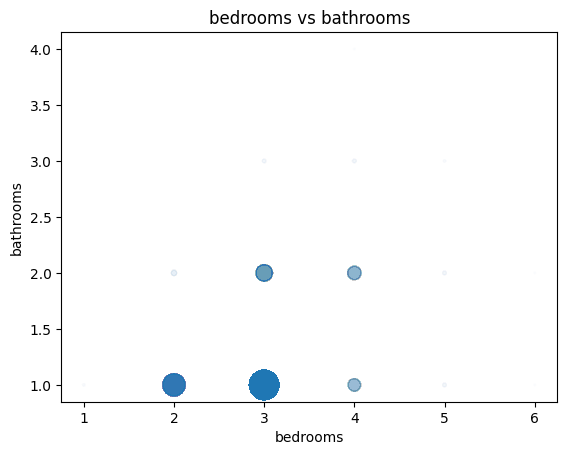

In [ ]:
freq_df = df.groupby(['bedrooms', 'bathrooms'])['bedrooms'].count().reset_index(name='frequency_bed')
merged_df = pd.merge(df, freq_df, on=['bedrooms', 'bathrooms'], how='left')
plt.scatter(x=merged_df.bedrooms, y=merged_df.bathrooms, s=merged_df.frequency_bed*2, alpha=0.01)
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.title('bedrooms vs bathrooms')
plt.show()

The number of bathrooms are mostly one but we do get higher frequencies of more bathrooms as the number of bedrooms increase

In [ ]:
zero_bathrooms_df = df[df['bathrooms'] == 0]
houses_with_zero_bathrooms = zero_bathrooms_df.groupby('bedrooms')['bedrooms'].count()
total_houses_per_bedroom = df.groupby('bedrooms')['bedrooms'].count()
percentage_zero_bathrooms = (houses_with_zero_bathrooms / total_houses_per_bedroom).fillna(0) * 100

hot_water_df = df[df['hotwaterheating'] == 'yes']
houses_with_water_heating = hot_water_df.groupby('bedrooms')['bedrooms'].count()
percentage_water_heating = (houses_with_water_heating / total_houses_per_bedroom).fillna(0) * 100

print("Percentage of houses with 0 bathrooms per bedroom type:")
print(percentage_zero_bathrooms)

print("\nPercentage of houses with hot water heating per bedroom type:")
print(percentage_water_heating)

Percentage of houses with 0 bathrooms per bedroom type:
bedrooms
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
Name: bedrooms, dtype: float64

Percentage of houses with hot water heating per bedroom type:
bedrooms
1     0.000000
2     3.676471
3     4.666667
4     4.210526
5    20.000000
6     0.000000
Name: bedrooms, dtype: float64


We can see that there are no houses with no bathrooms and also as the number of bedrooms increases so does the chances of having a water heater

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing (1).csv
